In [9]:
import pandas as pd
import plotly.express as px

In [29]:
df = pd.read_csv('/Users/carboni/Downloads/Leopard.csv')

In [30]:
keyword = 'Bête'
df = df[df['Cluster'].str.contains(keyword, case=False, na=False)]

In [ ]:
#keyword = 'Bête'.lower()
#df = df[df['Cluster'].str.lower() == keyword]

In [31]:
transformed_data = []

for cluster, group_df in df.groupby('Cluster'):
    group_df = group_df.sort_values(by='Date')
    group_df['origin'] = group_df['wkt']
    group_df['destination'] = group_df['wkt'].shift(-1).fillna(group_df['wkt'].iloc[-1])
    transformed_data.append(group_df)

# Concatenate all transformed groups
transformed_df = pd.concat(transformed_data)

In [33]:
transformed_df[['origin_longitude', 'origin_latitude']] = transformed_df['origin'].str.extract(r'POINT\(([^ ]+) ([^ ]+)\)')
transformed_df[['destination_longitude', 'destination_latitude']] = transformed_df['destination'].str.extract(r'POINT\(([^ ]+) ([^ ]+)\)')

In [35]:
cols_to_convert = ['origin_longitude', 'origin_latitude', 'destination_longitude', 'destination_latitude']

In [36]:
transformed_df[cols_to_convert] = transformed_df[cols_to_convert].apply(pd.to_numeric)

In [37]:
transformed_df.head(3)

,Cluster,manifest_url,canvas_number,image_url,City,Country,Title,wkt,Date,Journal Type,Unnamed: 10,origin,destination,origin_longitude,origin_latitude,destination_longitude,destination_latitude
2965,Bête Seule (Tigre),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k19...,422.0,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k19...,Paris,France,L'Artiste : journal de la littérature et des b...,POINT(2.3513888888889 48.856944444444),1831-07-10,Art History,NaN,POINT(2.3513888888889 48.856944444444),POINT(2.3513888888889 48.856944444444),2.351389,48.856944,2.351389,48.856944
2964,Bête Seule (Tigre),https://gallica.bnf.fr/iiif/ark:/12148/bpt6k19...,412.0,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k19...,Paris,France,L'Artiste : journal de la littérature et des b...,POINT(2.3513888888889 48.856944444444),1832-07-10,Art History,NaN,POINT(2.3513888888889 48.856944444444),POINT(-74.006015 40.712728),2.351389,48.856944,-74.006015,40.712728
2962,Bête Seule (Tigre),https://iiif.unige.ch/dhportal/ug27806292/mani...,320.0,https://iiif.unige.ch/iiif/2/fedora_ug27812760...,New York,United States of America,The Illustrated Magazine of Art,POINT(-74.006015 40.712728),1854-01-01,Art Journal,NaN,POINT(-74.006015 40.712728),POINT(2.3513888888889 48.856944444444),-74.006015,40.712728,2.351389,48.856944


In [39]:
transformed_df.to_csv('cube.csv', index=False)

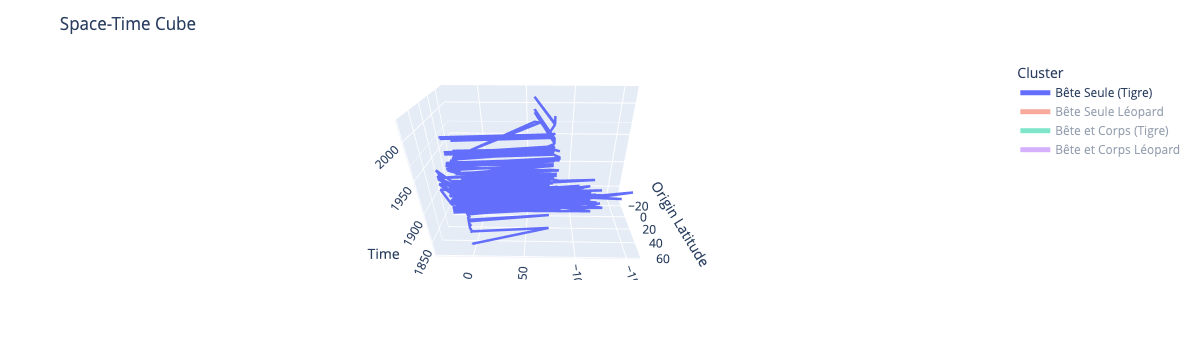

In [38]:
fig = px.line_3d(transformed_df, 
                 x='origin_longitude', 
                 y='origin_latitude', 
                 z='Date', 
                 color='Cluster', 
                 hover_name='City')
fig.update_traces(line=dict(width=5))
fig.update_layout(title='Space-Time Cube', 
                  scene=dict(
                      xaxis_title='Origin Longitude',
                      yaxis_title='Origin Latitude',
                      zaxis_title='Time'
                  ))
fig.show()
fig.write_html('3d_cube.html', auto_open=True)
fig.write_image("3d_cube.png", scale=7, width=2000)